<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/sigorta_modeli(d%C3%BC%C5%9F%C3%BCk%20rmse%20bulma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets,
    model_selection,
    preprocessing,
    metrics,
    linear_model,
    tree,
    ensemble,
    svm,
    neighbors,
    naive_bayes,
    cluster,
    decomposition,
    manifold,
    feature_extraction,
    feature_selection,
    pipeline,
    calibration,
    gaussian_process,
    kernel_approximation,
    kernel_ridge,
    multioutput,
    semi_supervised,
    dummy,
    discriminant_analysis,
    exceptions,
    compose,
    utils,
)



In [2]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')
df_subm=pd.read_csv('/content/sample_submission.csv')


In [3]:
df_train.head(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0


In [4]:
df_train.dtypes

,0
id,int64
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Education Level']=le.fit_transform(df_train['Education Level'])
df_train['Occupation']=le.fit_transform(df_train['Occupation'])
df_train['Marital Status']=le.fit_transform(df_train['Marital Status'])
df_train['Gender']=le.fit_transform(df_train['Gender'])
df_train["Location"]=le.fit_transform(df_train["Location"])
df_train["Policy Type"]=le.fit_transform(df_train["Policy Type"])
df_train["Policy Start Date"]=le.fit_transform(df_train["Policy Start Date"])
df_train["Customer Feedback"]=le.fit_transform(df_train["Customer Feedback"])
df_train["Smoking Status"]=le.fit_transform(df_train["Smoking Status"])
df_train["Exercise Frequency"]=le.fit_transform(df_train["Exercise Frequency"])
df_train["Property Type"]=le.fit_transform(df_train["Property Type"])


In [6]:
df_train.head(1)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,...,2.0,17.0,372.0,5.0,23213,2,0,3,3,2869.0


In [7]:
y = df_train['Premium Amount']
x = df_train.drop(columns=['Premium Amount', 'id'],axis=1)

In [8]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
y_train

,Premium Amount
32255,194.0
31865,441.0
3623,26.0
8137,1089.0
28639,1489.0
...,...
29802,115.0
5390,1054.0
860,1970.0
15795,1195.0


In [10]:
x_train.isnull().sum()
x_train.fillna(0,inplace=True)

In [11]:
x_train.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [15]:
y_train.isna().sum()
y_train.fillna(0,inplace=True)

In [16]:
gb=ensemble.GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [17]:
x_test.fillna(0,inplace=True)

In [18]:
df_test.head(1)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House


In [ ]:
df_test.shape

In [19]:
df_test['Education Level']=le.fit_transform(df_test['Education Level'])
df_test['Occupation']=le.fit_transform(df_test['Occupation'])
df_test['Marital Status']=le.fit_transform(df_test['Marital Status'])
df_test['Gender']=le.fit_transform(df_test['Gender'])
df_test["Location"]=le.fit_transform(df_test["Location"])
df_test["Policy Type"]=le.fit_transform(df_test["Policy Type"])
df_test["Policy Start Date"]=le.fit_transform(df_test["Policy Start Date"])
df_test["Customer Feedback"]=le.fit_transform(df_test["Customer Feedback"])
df_test["Smoking Status"]=le.fit_transform(df_test["Smoking Status"])
df_test["Exercise Frequency"]=le.fit_transform(df_test["Exercise Frequency"])
df_test["Property Type"]=le.fit_transform(df_test["Property Type"])

In [20]:
df_test.head(1)
df_test.isna().sum()
df_test.fillna(0,inplace=True)

In [21]:
y_pred=gb.predict(x_test)
y_pred

array([1073.88366207, 1151.87855968, 1137.21130202, ...,  626.69397948,
       1011.91348944, 1023.06636488])

In [22]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

866.0955811017805

In [23]:
test_pred=gb.predict(df_test.drop(columns=['id'],axis=1))
test_pred

array([1382.49644381,  778.17052327, 1052.21755272, ..., 1105.14535265,
        890.11708627, 1056.26395793])

In [24]:
test_pred.shape

(33544,)

In [25]:
df_train = pd.concat([x_train,np.log1p(y)], axis = 1)
df_test = df_test.copy()
test_pred = np.expm1(test_pred)
y_pred=np.expm1(y_pred)


<ipython-input-25-8c3939a22411>:3: RuntimeWarning: overflow encountered in expm1
  test_pred = np.expm1(test_pred)
<ipython-input-25-8c3939a22411>:4: RuntimeWarning: overflow encountered in expm1
  y_pred=np.expm1(y_pred)


In [26]:
y_val_log=np.log1p(y_test)

In [27]:
y_val_log

,Premium Amount
18675,5.429346
11229,7.410347
1118,6.282267
5038,7.178545
15537,3.367296
...,...
16414,5.978886
1563,3.828641
5784,3.688879
8029,7.132498


In [28]:
y_train_log=np.log1p(y_train)
y_train_log

,Premium Amount
32255,5.273000
31865,6.091310
3623,3.295837
8137,6.993933
28639,7.306531
...,...
29802,4.753590
5390,6.961296
860,7.586296
15795,7.086738


In [35]:
y_train_log.isna().sum()
y_train_log.fillna(0,inplace=True)

In [37]:
df_train = pd.concat([x_train, np.log1p(y)], axis=1)
df_test = df_test.copy()

# Define features and target
X = df_train.drop(['Premium Amount'], axis=1)  # Replace with your actual target column name
y_log = df_train['Premium Amount']


In [39]:

# Split into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_val, y_train_log, y_val_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)


In [42]:
X_train.isna().sum()
X_train.fillna(0,inplace=True)

In [44]:
# ... (previous code) ...

# Split into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_val, y_train_log, y_val_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Handle NaN values in y_train_log before training
y_train_log = y_train_log.fillna(y_train_log.mean())  # Replace NaNs with the mean

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train_log)

# ... (rest of the code) ...

RandomForestRegressor(random_state=42)

In [46]:
model.score(X_train,y_train_log)

0.6535520957988168

In [49]:
y_pred = model.predict(X_val)
rmse = np.sqrt(metrics.mean_squared_error(y_val_log, y_pred))
print(rmse)

1.0872862971479669


In [54]:
import plotly.graph_objects as go

scatter = go.Scatter(
    x=y_val_log,
    y=y_pred,
    mode='markers',
    marker=dict(
        size=8,
        opacity=0.5
    ),
    name='Predicted vs Actual'
)


min_val = min(y_val_log.min(), y_pred.min())
max_val = max(y_val_log.max(), y_pred.max())
line = go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Perfect Prediction'
)


layout = go.Layout(
    title='Actual vs. Predicted Values',
    xaxis=dict(title='Actual Values (y_val_log)'),
    yaxis=dict(title='Predicted Values (y_pred)'),
    showlegend=True
)

# Create figure and display
fig = go.Figure(data=[scatter, line], layout=layout)
fig.show()


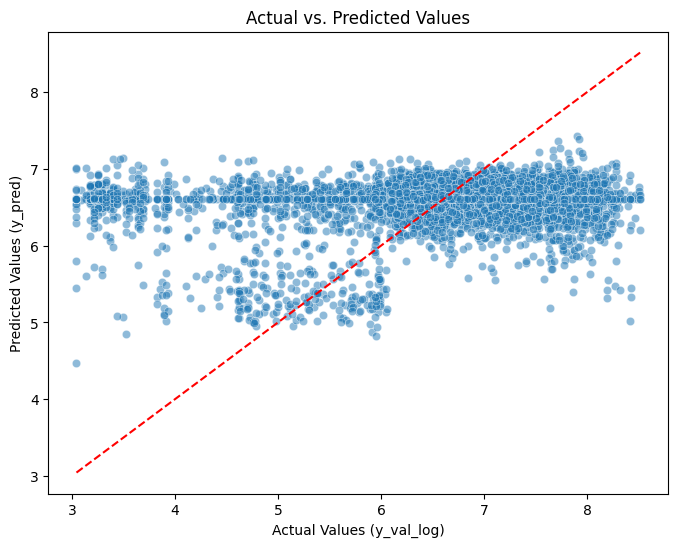

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_log, y=y_pred, alpha=0.5)
min_val = min(y_val_log.min(), y_pred.min())
max_val = max(y_val_log.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel("Actual Values (y_val_log)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

plt.show()
